In [1]:
import numpy as np
import pandas as pd
import csv
import json

In [2]:
'''
ID - an Id that represents a (Shop, Item) tuple within the test set
shop_id - unique identifier of a shop
item_id - unique identifier of a product
item_category_id - unique identifier of item category
item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
item_price - current price of an item
date - date in format dd/mm/yyyy
date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
item_name - name of item
shop_name - name of shop
item_category_name - name of item category
'''

'\nID - an Id that represents a (Shop, Item) tuple within the test set\nshop_id - unique identifier of a shop\nitem_id - unique identifier of a product\nitem_category_id - unique identifier of item category\nitem_cnt_day - number of products sold. You are predicting a monthly amount of this measure\nitem_price - current price of an item\ndate - date in format dd/mm/yyyy\ndate_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33\nitem_name - name of item\nshop_name - name of shop\nitem_category_name - name of item category\n'

In [3]:
요일
계절

NameError: name '요일' is not defined

In [37]:
items = pd.read_csv("../data/items.csv")
item_cat = pd.read_csv("../data/item_categories.csv")
train = pd.read_csv("../data/sales_train.csv")
sample_submission = pd.read_csv("../data/sample_submission.csv")
shops = pd.read_csv("../data/shops.csv")
test = pd.read_csv("../data/test.csv")

In [5]:
print('items : ', len(items))
print('item_cat : ', len(item_cat))
print('train : ' , len(train))
print('test : ', len(test))
print('shops : ', len(shops))

items :  22170
item_cat :  84
train :  2935849
test :  214200
shops :  60


In [6]:
print(min(train['item_cnt_day']), max(train['item_cnt_day']))

-22.0 2169.0


In [7]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [28]:
train.head(10)
# train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [42]:
train['date'] = train['date'].str[3:]

In [44]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,01.2013,0,59,22154,999.00,1.0
1,01.2013,0,25,2552,899.00,1.0
2,01.2013,0,25,2552,899.00,-1.0
3,01.2013,0,25,2554,1709.05,1.0
4,01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.2015,33,25,7409,299.00,1.0
2935845,10.2015,33,25,7460,299.00,1.0
2935846,10.2015,33,25,7459,349.00,1.0
2935847,10.2015,33,25,7440,299.00,1.0


In [49]:
train_groupby = train.groupby(['shop_id', 'item_id', 'date'])['item_cnt_day'].agg('sum').reset_index()
train_groupby

,shop_id,item_id,date,item_cnt_day
0,0,30,02.2013,31.0
1,0,31,02.2013,11.0
2,0,32,01.2013,6.0
3,0,32,02.2013,10.0
4,0,33,01.2013,3.0
...,...,...,...,...
1609119,59,22164,04.2015,2.0
1609120,59,22164,07.2015,1.0
1609121,59,22167,06.2014,1.0
1609122,59,22167,10.2013,1.0


In [152]:
train_groupby_item[train_groupby_item['item_id'] == 2552]

,item_id,item_cnt_day
2495,2552,5.0


In [151]:
train_groupby_shop = train_groupby.groupby(['shop_id'])['item_cnt_day'].agg('sum').reset_index()
train_groupby_item = train_groupby.groupby(['item_id'])['item_cnt_day'].agg('sum').reset_index()
train_groupby_shop_and_item = train_groupby.groupby(['shop_id', 'item_id','date'])['item_cnt_day'].agg('sum').reset_index()

In [10]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [11]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [12]:
test.head() ##언젠지 없냐?

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [13]:
min(items['item_category_id'])

0

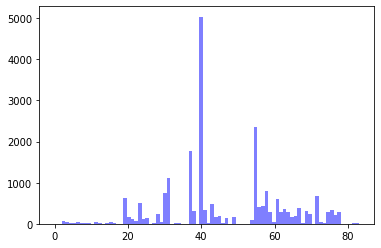

In [14]:
### item_category_id 히스토그램
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

num_bins = 84
n, bins, patches = plt.hist(items['item_category_id'], num_bins, facecolor='blue', alpha=0.5)
plt.show()

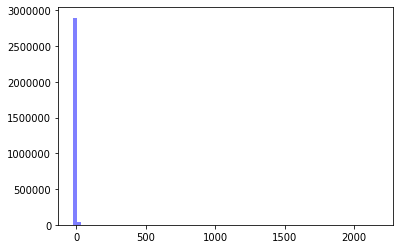

In [15]:
### item_category_id 히스토그램
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

num_bins = 84
n, bins, patches = plt.hist(train['item_cnt_day'], num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [18]:
len(train[train['item_cnt_day']==-3])

14

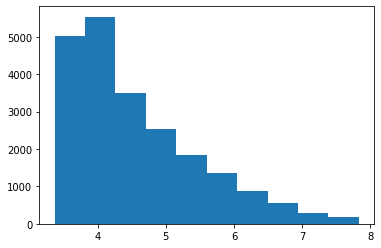

In [133]:
### item_category_id 히스토그램
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
# histogram_data = train_groupby_shop_and_item[train_groupby_shop_and_item['item_cnt_day']<10][train_groupby_shop_and_item['item_cnt_day']>-1]['item_cnt_day']
histogram_data = train_groupby_item[train_groupby_item['item_cnt_day']<2500]['item_cnt_day']
log_his = np.log(histogram_data+40)
np_log_his = np.array(log_his)
sort_his = np.sort(np_log_his)[::-1]
# histogram_data = train_groupby_item['item_cnt_day']

num_bins = 10000
#n, bins, patches = plt.hist(log_his, num_bins, facecolor='blue', alpha=0.5)
plt.hist(sort_his)
#plt.plot(sort_his)
plt.show()

In [134]:
np.sort(np_log_his)[::-1]

Object `np.sort(np_log_his)[::-1]` not found.


In [115]:
histogram_data.head()

0    1.0
1    6.0
2    2.0
3    2.0
4    1.0
Name: item_cnt_day, dtype: float64

In [65]:
train_groupby_shop

,shop_id,item_cnt_day
0,0,11705.0
1,1,6311.0
2,2,30620.0
3,3,28355.0
4,4,43942.0
5,5,42762.0
6,6,100489.0
7,7,67058.0
8,8,3595.0
9,9,15866.0
